In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import r2_score
from statsmodels.api import OLS
import statsmodels.api as sm
import scipy.stats as stats


In [6]:
# load dataframe 
bikes_df = pd.read_pickle('cleaned_data/bikes_regression.pkl')

In [7]:
bikes_df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2012', 'hr_1', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_2', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7',
       'hr_8', 'hr_9', 'holiday_not_holiday', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'workingday_working', 'weathersit_heavy_rain_snow',
       'weathersit_light_rain_snow', 'weathersit_mist'],
      dtype='object')

In [8]:
# Define the Problem
# use all column values 
target = bikes_df.cnt
x_cols = bikes_df.drop(columns = ['cnt'])

In [10]:
# split data into train and test, 25% test, 75% train 
X_train, X_test, y_train, y_test = train_test_split(
    x_cols, target, test_size=0.25, random_state=42)

In [13]:
reg_1 = LinearRegression().fit(X_train, y_train)
y_pred_1 = reg_1.predict(X_test)
print('reg_1_train:', reg_1.score(X_train,y_train))
print('reg_1_test:', r2_score(y_test, y_pred_1))


reg_1_train: 0.8255663753486923
reg_1_test: 0.8169441029792651


In [29]:
# use statsmodel to test for p values 
X = sm.add_constant(X_train)
model_stats = OLS(y_train,X)
results_stats = model_stats.fit()
results_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1537.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:23:19   Log-Likelihood:                -12310.
No. Observations:               13034   AIC:                         2.470e+04
Df Residuals:                   12993   BIC:                         2.501e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          4.3605      0.081     54.007      0.000       4.202       4.519
temp                           0.6261      0.019     33.527      0.000       0.590       0.663
hum                           -0.3363      0.073     -4.633      0.000      -0.479      -0.194
windspeed                     -0.2741      0.048     -5.717      0.000      -0.368      -0.180
season_spring                 -0.3513      0.024    -14.902      0.000      -0.398      -0.305
season_summer                 -0.0024      0.016     -0.148      0.883      -0.034       0.029
season_winter                  0.1362      0.019      7.344      0.000       0.100       0.173
yr_2012                        0.4631      0.011     41.987      0.000       0.441       0.485
hr_1                          -0.6036      0.038    -15.945      0.000      -0.678      -0.529
hr_10                          1.2754      0.038     33.435      0.000       1.201       1.350
hr_11                          1.3852      0.039     35.961      0.000       1.310       1.461
hr_12                          1.5880      0.038     41.527      0.000       1.513       1.663
hr_13                          1.5639      0.038     40.694      0.000       1.489       1.639
hr_14                          1.4713      0.039     37.536      0.000       1.394       1.548
hr_15                          1.5229      0.039     39.089      0.000       1.447       1.599
hr_16                          1.7821      0.039     46.037      0.000       1.706       1.858
hr_17                          2.1793      0.039     56.435      0.000       2.104       2.255
hr_18                          2.0807      0.039     53.799      0.000       2.005       2.156
hr_19                          1.7944      0.038     46.735      0.000       1.719       1.870
hr_2                          -1.1787      0.038    -31.201      0.000      -1.253      -1.105
hr_20                          1.5169      0.038     39.746      0.000       1.442       1.592
hr_21                          1.2501      0.038     32.943      0.000       1.176       1.324
hr_22                          0.9896      0.038     26.114      0.000       0.915       1.064
hr_23                          0.5878      0.038     15.434      0.000       0.513       0.662
hr_3                          -1.7282      0.039    -44.509      0.000      -1.804      -1.652
hr_4                          -2.0265      0.038    -53.159      0.000      -2.101      -1.952
hr_5                          -0.8957      0.038    -23.549      0.000      -0.970      -0.821
hr_6                           0.2725      0.038      7.139      0.000       0.198       0.347
hr_7                           1.2784      0.038     33.451      0.000       1.203       1.353
hr_8                           1.9220      

In [32]:
X_pred = sm.add_constant(X_test)
y_pred_stats = results_stats.predict(X_pred)
print('reg_stat_test:', r2_score(y_test, y_pred_stats))

reg_stat_test: 0.8169441029792652


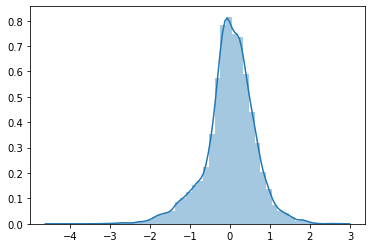

In [35]:
sns.distplot(results_stats.resid)  # normally distributed 

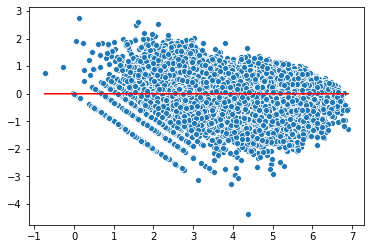

In [65]:
sns.scatterplot(results_stats.predict(X), results_stats.resid)
sns.lineplot(results_stats.predict(X), [0 for i in range(len(X))],color = 'red') 
# have heteroscedasticity 

In [72]:
# remove high p value and see how it affects results 
columns_high_p= ['season_summer','weekday_Sun','weathersit_heavy_rain_snow']
X_colsremoved= X.drop(columns=columns_high_p)
X_pred_colsremoved = X_pred.drop(columns=columns_high_p)

In [73]:
model_stats_colsremoved = OLS(y_train,X_colsremoved)
results_stats_colsremoved = model_stats_colsremoved.fit()
results_stats_colsremoved.summary()
# removed collinearity warning 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1618.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:44:31   Log-Likelihood:                -12311.
No. Observations:               13034   AIC:                         2.470e+04
Df Residuals:                   12995   BIC:                         2.499e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          4.3628      0.081     54.173      0.000       4.205       4.521
temp                           0.6274      0.018     35.559      0.000       0.593       0.662
hum                           -0.3390      0.073     -4.674      0.000      -0.481      -0.197
windspeed                     -0.2748      0.048     -5.752      0.000      -0.368      -0.181
season_spring                 -0.3495      0.020    -17.843      0.000      -0.388      -0.311
season_winter                  0.1379      0.015      9.007      0.000       0.108       0.168
yr_2012                        0.4630      0.011     41.994      0.000       0.441       0.485
hr_1                          -0.6036      0.038    -15.944      0.000      -0.678      -0.529
hr_10                          1.2753      0.038     33.433      0.000       1.200       1.350
hr_11                          1.3849      0.039     35.957      0.000       1.309       1.460
hr_12                          1.5877      0.038     41.523      0.000       1.513       1.663
hr_13                          1.5634      0.038     40.694      0.000       1.488       1.639
hr_14                          1.4708      0.039     37.533      0.000       1.394       1.548
hr_15                          1.5224      0.039     39.091      0.000       1.446       1.599
hr_16                          1.7808      0.039     46.033      0.000       1.705       1.857
hr_17                          2.1789      0.039     56.434      0.000       2.103       2.255
hr_18                          2.0794      0.039     53.795      0.000       2.004       2.155
hr_19                          1.7941      0.038     46.735      0.000       1.719       1.869
hr_2                          -1.1787      0.038    -31.201      0.000      -1.253      -1.105
hr_20                          1.5168      0.038     39.743      0.000       1.442       1.592
hr_21                          1.2500      0.038     32.942      0.000       1.176       1.324
hr_22                          0.9895      0.038     26.113      0.000       0.915       1.064
hr_23                          0.5878      0.038     15.433      0.000       0.513       0.662
hr_3                          -1.7281      0.039    -44.509      0.000      -1.804      -1.652
hr_4                          -2.0263      0.038    -53.161      0.000      -2.101      -1.952
hr_5                          -0.8955      0.038    -23.548      0.000      -0.970      -0.821
hr_6                           0.2727      0.038      7.145      0.000       0.198       0.348
hr_7                           1.2785      0.038     33.461      0.000       1.204       1.353
hr_8                           1.9221      0.038     50.592      0.000       1.848       1.997
hr_9                           1.5891      

In [74]:
y_pred_stats_colsremoved= results_stats_colsremoved.predict(X_pred_colsremoved)
print('reg_stat_test:', r2_score(y_test, y_pred_stats_colsremoved))

reg_stat_test: 0.8170407718705477


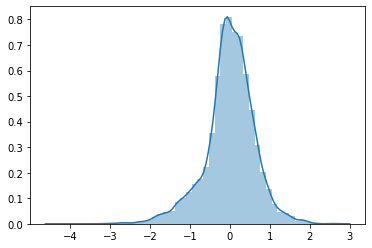

In [75]:
sns.distplot(results_stats_colsremoved.resid)

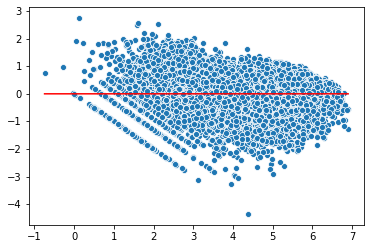

In [76]:
sns.scatterplot(results_stats_colsremoved.predict(X_colsremoved), results_stats_colsremoved.resid)
sns.lineplot(results_stats_colsremoved.predict(X_colsremoved), [0 for i in range(len(X_colsremoved))],color = 'red') 
# min max normalized causing cutoff 

In [120]:
# use lasso and ridge regression regularization to help improve r2 
# Build a Ridge, Lasso 

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)


Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
# Create preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = lasso.predict(X_train)
y_h_lasso_test = lasso.predict(X_test)

In [122]:
print('ridge_train:', r2_score(y_train, y_h_ridge_train))
print('ridge_test:', r2_score(y_test, y_h_ridge_test))

ridge_train: 0.825566041637864
ridge_test: 0.8169571514147422


In [119]:
print('lasso_train:', r2_score(y_train, y_h_lasso_train))
print('lasso_test:', r2_score(y_test, y_h_lasso_test))
# created many zero coefficients 

lasso_train: 0.8255658332859455
lasso_test: 0.816965691419834


In [240]:
regr_cv = RidgeCV(cv = 10, alphas=np.linspace(0.5,2,10))
model_cv = regr_cv.fit(x_cols, target)
model_cv.alpha_
y_ridge_train = regr_cv.predict(x_cols)
# y_ridge_test = regr_cv.predict(X_test)
print('ridge_train:', r2_score(target, y_ridge_train))
# print('ridge_test:', r2_score(y_test, y_ridge_test))
pd.DataFrame({'cols': x_cols.columns, 'coef': regr_cv.coef_, 'abs_coef': np.abs(
    regr_cv.coef_)}).sort_values('abs_coef', ascending=False)[:25]

ridge_train: 0.8235684886131086


,cols,coef,abs_coef
15,hr_17,2.127065,2.127065
24,hr_4,-2.069471,2.069471
16,hr_18,2.047837,2.047837
28,hr_8,1.869843,1.869843
23,hr_3,-1.772511,1.772511
17,hr_19,1.756434,1.756434
14,hr_16,1.734804,1.734804
29,hr_9,1.553834,1.553834
10,hr_12,1.531616,1.531616
11,hr_13,1.507332,1.507332


In [239]:
regl_cv = LassoCV(cv=10, alphas=np.linspace(0.0001, 0.000001, 10))
modell_cv = regl_cv.fit(x_cols, target)
modell_cv.alpha_
y_lasso_train = regl_cv.predict(x_cols)
# y_lasso_test = regl_cv.predict(X_test)
print('lasso_train:', r2_score(target, y_lasso_train))
# print('lasso_test:', r2_score(y_test, y_lasso_test))
sum(regl_cv.coef_ == 0)
pd.DataFrame({'cols': x_cols.columns, 'coef': regl_cv.coef_, 'abs_coef': np.abs(
    regl_cv.coef_)}).sort_values('abs_coef', ascending=False)[:25]

lasso_train: 0.8235752321815819


,cols,coef,abs_coef
15,hr_17,2.137374,2.137374
24,hr_4,-2.063609,2.063609
16,hr_18,2.057801,2.057801
28,hr_8,1.878687,1.878687
23,hr_3,-1.766124,1.766124
17,hr_19,1.765867,1.765867
14,hr_16,1.744589,1.744589
29,hr_9,1.562469,1.562469
10,hr_12,1.540950,1.540950
11,hr_13,1.516800,1.516800


In [220]:
linreg = LinearRegression()
print(cross_val_score(linreg, x_cols, target, cv=10, scoring='neg_mean_absolute_error')*-1)
print(np.sqrt((cross_val_score(linreg, x_cols, target, cv=10, scoring='neg_mean_squared_error')*-1)))
print(np.mean(cross_val_score(linreg, x_cols, target, cv=10, scoring='r2')))

[0.52062697 0.45566596 0.43864451 0.44953043 0.49677009 0.55876931
 0.43041247 0.43762302 0.42759643 0.49038777]
[0.74017198 0.6094059  0.56650474 0.62373975 0.67656616 0.72571148
 0.59359372 0.57070002 0.56430628 0.66527637]
0.8005550113246647


In [202]:
# cross val 
linreg = LinearRegression()
print(cross_val_score(linreg, x_cols.drop(columns=columns_high_p), target, cv=10, scoring='neg_mean_absolute_error')*-1)
print(np.sqrt((cross_val_score(linreg, x_cols.drop(columns= columns_high_p), target, cv=10, scoring='neg_mean_squared_error')*-1)))
print(np.mean(cross_val_score(linreg, x_cols.drop(columns = columns_high_p), target, cv=10, scoring='r2')))


[0.52015003 0.45512744 0.43863848 0.44882053 0.49682071 0.55802665
 0.43045552 0.43635275 0.42740464 0.49029522]
[0.73956583 0.60921505 0.56653854 0.62328209 0.67657721 0.72483115
 0.59355792 0.56910296 0.5640451  0.66510874]
0.8008178248695084
